# Clase 13 - Análisis Exploratorio de Datos

**MDS7202: Laboratorio de Programación Científica para Ciencia de Datos**

**Profesor: Pablo Badilla**

## Objetivos de la Clase 

![Etapas de un Proyecto de Ciencia de Datos](./resources/etapas.png)

Como hemos visto anteriomente, los datos son la materia prima para la contrucción de análisis estadísticos y modelos predictivos. Esto implica que las hipótesis y predicciones  elaboradas por dichos modelos estarán directamente relacionados con la calidad de los datos. Por ende, es crítico asegurar un preprocesado y una buena examinación de los datasets a trabajar.

El contenido de esta cátedra, se centra en las técnicas esenciales para el preprocesado de datos usando las herramientas que hemos visto hasta el momento. 




## Análisis Exploratorio de Datos

El análisis exploratorio de los datos (Exploratory data analysis [EDA] en inglés) consiste en realizar investigaciones iniciales sobre los datos **con el fin de descubrir sus patrones y anomalías, como también testear hipótesis que tengamos sobre estos**. Comunmente este análisis va de la mano de la **estadística descriptiva y de las visualizaciones.**



    
<img src='./resources/eda_related.png' alt='Gráficos en análisis exploratorio de datos'/>

<div align='center'/>
Análisis exploratorio de datos. 
<br>
Fuente: <a href='https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15'>What is Exploratory Data Analysis?</a>
</center>



En general, podemos resumir este proceso en estas 4 etapas: 

1. **Entender el problema y el dataset con el que trabajaremos.**
2. **Análisis Univariado**: Estudiar los patrones de las variables a través de estadísticas de resumen y análisis de la distribución de los datos.

    
  - 2.5 En el caso de trabajar con un problema enfocado en la predicción, también podemos analizar cada variable con respecto a la variable a predecir.
    
    
3. **Análisis Multivariado**: Estudiar como se comporta una variable con respecto a las otras.
4. **Análisis y Limpieza de los Datos Faltantes.**




### Repaso: Estadísticas de Resumen


Las estadísticas de resumen son valores que explican propiedades y patrones de los datos. 
Ejemplo: 
    
- Medidas de tendencia central (ver como se comportan los datos a través de valores centrales) como la media, mediana y moda.
- Dispersión (miden la variabilidad de los datos) como el rango, la desviación estándar y la varianza. 
- Percentiles y Cuartiles.

En el caso en que estemos analizando de forma multivariada, podemos usar: 

- Correlación (mide el grado de asociación lineal entre dos variables).
- Tablas de contingencia (conteo entre ocurrencias de variables categóricas).


Mas información en: https://github.com/dccuchile/CC5206/blob/master/slides/Clase_3_explora.pdf


## Problema de Esta Clase: House Pricing



![House Pricing](https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png)

El dataset **`house pricing`** consiste en 80 variables (79 variables explicativas más una variable objetivo) que describen aspectos fundamentales de hogares residenciales en la ciudad de *Ames, Iowa*. 

La variable objetivo de este dataset es generar un modelo que prediga el precio final de cada hogar por medio de una regresión.

Es un problema "ultra conocido"y pueden encontrar su descripción aquí: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm

# El conjunto a trabajar es el de entrenamiento
df = pd.read_csv("./resources/train.csv", index_col="Id")


In [2]:
# Preprocesamiento

# Etapa 1: Convertir mes y año a Datetime
df["DateSold"] = pd.to_datetime(
    "1/" + df["MoSold"].astype(str) + "/" + df["YearBuilt"].astype(str), yearfirst=False
)

# Etapa 2: Generar cuartiles para los precios
df["SalePriceQCut"] = pd.qcut(
    df["SalePrice"], 4, ["Low", "Low-Mid", "Mid-High", "High"]
)

# Etapa 3: Convertir strings a categorías
df = pd.concat(
    [
        df.select_dtypes([], ["object"]),
        df.select_dtypes(["object"]).apply(pd.Series.astype, dtype="category"),
    ],
    axis=1,
)

In [3]:
df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'DateSold', 'SalePriceQCut',
       'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', '

In [4]:
df = df.loc[
    :,
    [
        # Terreno
        "LotArea",      # Area del terreno
        "LandSlope",    # Pendiente del terreno
        "Neighborhood", # Barrio
        
        # Metadatos de la Vivienda
        "BldgType",     # Tipo de vivienda
        "YearBuilt",    # Año de construcción
        "YearRemodAdd", # Año de remodelación
        "Utilities",    # Agua, luz, etc...
        
        # Materiales
        "Foundation",   # Fundación de la vivienda
        "RoofMatl",     # Material del techo
        "RoofStyle",    # Estilo del techo
        "Exterior1st",  # Material del Exterior
        "ExterCond",    # Condición del material exterior
        
        # Interior de la casa
        "GrLivArea",    # Area habitable sobre el nivel del suelo.
        "1stFlrSF",     # Area primer piso
        "2ndFlrSF",     # Area segundo piso
        "FullBath",     # Baños completos
        'HalfBath',     # Baños de visita?
        "BedroomAbvGr", # Piezas
        "KitchenAbvGr", # Cocinas
        "KitchenQual",  # Calidad de la cocina
        
        # Sótano
        "TotalBsmtSF",  # Total sótano
        "BsmtCond",     # Condición del sótano
        
        # Garaje
        "GarageType",   # Tipo de garaje
        "GarageCars",   # Cantidad de autos por garaje
        
        # Piscina
        "PoolArea",     # Area de la piscina
        "PoolQC",       # Calidad de la piscina
        
        # Calefacción y Aire
        "Heating",      # Calefacción
        "HeatingQC",    # Calidad de la Calefacción
        "CentralAir",   # Aire Acondicionado Central
        
        # Calidad y Condición
        "OverallQual",  # Calidad general
        "OverallCond",  # Condición general actual
        
        # Datos de la venta
        "DateSold",     # Mes y Año de venta
        "SaleType",     # Tipo de venta
        "SaleCondition",# Condición de la vivienda en la venta
        "SalePrice",    # Precio de la venta
        "SalePriceQCut",# Cuartiles del precio de la vivienda
    ],
]

numeric = df.select_dtypes(["int64"]).columns
categorical = df.select_dtypes(["category"]).columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   LotArea        1460 non-null   int64         
 1   LandSlope      1460 non-null   category      
 2   Neighborhood   1460 non-null   category      
 3   BldgType       1460 non-null   category      
 4   YearBuilt      1460 non-null   int64         
 5   YearRemodAdd   1460 non-null   int64         
 6   Utilities      1460 non-null   category      
 7   Foundation     1460 non-null   category      
 8   RoofMatl       1460 non-null   category      
 9   RoofStyle      1460 non-null   category      
 10  Exterior1st    1460 non-null   category      
 11  ExterCond      1460 non-null   category      
 12  GrLivArea      1460 non-null   int64         
 13  1stFlrSF       1460 non-null   int64         
 14  2ndFlrSF       1460 non-null   int64         
 15  FullBath       1460 n

In [6]:
df.head()

LotArea LandSlope Neighborhood BldgType  YearBuilt  YearRemodAdd  \
Id                                                                     
1      8450       Gtl      CollgCr     1Fam       2003          2003   
2      9600       Gtl      Veenker     1Fam       1976          1976   
3     11250       Gtl      CollgCr     1Fam       2001          2002   
4      9550       Gtl      Crawfor     1Fam       1915          1970   
5     14260       Gtl      NoRidge     1Fam       2000          2000   

   Utilities Foundation RoofMatl RoofStyle  ... Heating HeatingQC  CentralAir  \
Id                                          ...                                 
1     AllPub      PConc  CompShg     Gable  ...    GasA        Ex           Y   
2     AllPub     CBlock  CompShg     Gable  ...    GasA        Ex           Y   
3     AllPub      PConc  CompShg     Gable  ...    GasA        Ex           Y   
4     AllPub     BrkTil  CompShg     Gable  ...    GasA        Gd           Y   
5     AllPub      PConc  CompShg     Gable  ...    GasA        Ex           Y   

    OverallQual  OverallCond   DateSold  SaleType  SaleCondition  SalePrice  \
Id                                                                            
1             7            5 2003-01-02        WD         Normal     208500   
2             6            8 1976-01-05        WD         Normal     181500   
3             7            5 2001-01-09        WD         Normal     223500   
4             7            5 1915-01-02        WD        Abnorml     140000   
5             8            5 2000-01-12        WD         Normal     250000   

   SalePriceQCut  
Id                
1       Mid-High  
2       Mid-High  
3           High  
4        Low-Mid  
5           High  

[5 rows x 36 columns]

---

## 1. Perfilamiento Univariado

El punto inicial para comprender la naturaleza de una variable, pasa por sumarizar sus valores usando estadísticas de resumen, caracterizar su distribución y (en el caso que aplique) analizar su relación con respecto a la variable objetivo. 

El objetivo final de esta etapa es comprender qué papel juega cada variable (de forma independiente) en la resolución del problema.

### Análisis de la Variable Dependiente 

El paso inicial es saber como se distribuye la variable dependiente, es decir, el precio de las casas.


In [7]:
df[["SalePrice"]].describe()

SalePrice
count    1460.000000
mean   180921.195890
std     79442.502883
min     34900.000000
25%    129975.000000
50%    163000.000000
75%    214000.000000
max    755000.000000

Este primer análisis lo haremos a través de un histograma en conjunto con un boxplot.


1. Histograma: Permite ver la distribución de los datos.
2. Boxplots: Se construyen usando los cuartiles. 
  - La caja muestra el primer y tercer cuartil. 
  - La mediana está mostrada en la división de la caja.
  - El ancho de la caja es el rango intercuantílico (Q3 - Q1). 
  - Los brazos representan el rango intercuantílico * +/- 1.5. Los valores fuera de este rango pueden ser considerados datos fuera de la norma / outliers.

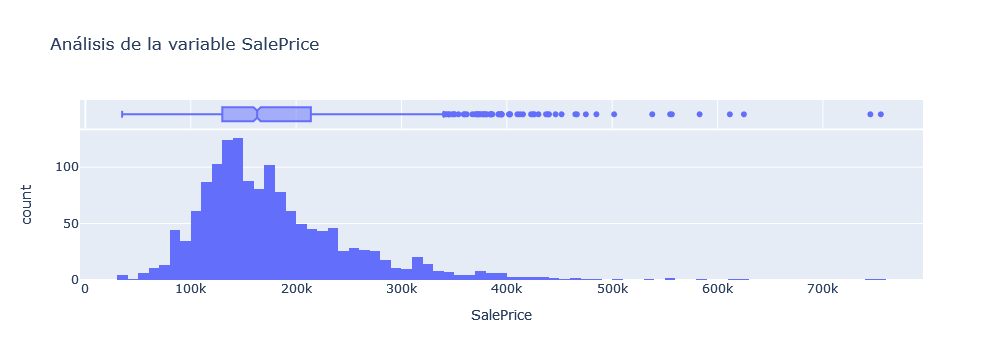

In [8]:
import plotly.express as px

px.histogram(
    df, 
    x="SalePrice", 
    title="Análisis de la variable SalePrice", 
    marginal="box"
)

Bajo estos gráficos podemos concluir que:
    - La mayoría de las propiedades se concentran cerca del promedio de la distribución.
    - Existen algunas propiedades muy caras que hacen que la cola de la distribución sea muy larga hacia la derecha. Esto se confirma con el boxplot, en donde existen muchos puntos outliers.
    - Es relativamente uniforme a lo largo del dominio, salvo por algunas discontinudades, como por ejemplo en 170k a 180k.
    - 
    

### Caracterizar distribuciones

Existen algunas medidas útiles para caracterizar la distribución de una variable (aplican bien cuando las distribuciones son normales).

1. **Skewness**: Permite establecer el grado de simetría (o asimetría) que presenta una distribución de probabilidad de una variable aleatoria sin tener que hacer su representación gráfica. 

<div align='center'>
    <img src='./resources/skew.png' alt='Skewness' width=600/>
</div>

2. **Curtosis**: Determina el grado de concentración que presentan los valores en la región central de la distribución.

<div align='center'>
    <img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcT1n1f_pfBRWXsET7Zk8UbRnzKLDPqsBs5ESL_uh9aKmlDcIpkO' alt='Kurtosis' width=600/>
</div>


In [9]:
# skewness and kurtosis
print("Skewness: %f" % df["SalePrice"].skew())
print("Kurtosis: %f" % df["SalePrice"].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


### Distribuciones de Variables Numéricas

A continuación, generaremos histogramas que nos permitirán entender y visualizar la geometría de cada distribución.

In [10]:
numeric

Index(['LotArea', 'YearBuilt', 'YearRemodAdd', 'GrLivArea', '1stFlrSF',
       '2ndFlrSF', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotalBsmtSF', 'GarageCars', 'PoolArea', 'OverallQual', 'OverallCond',
       'SalePrice'],
      dtype='object')

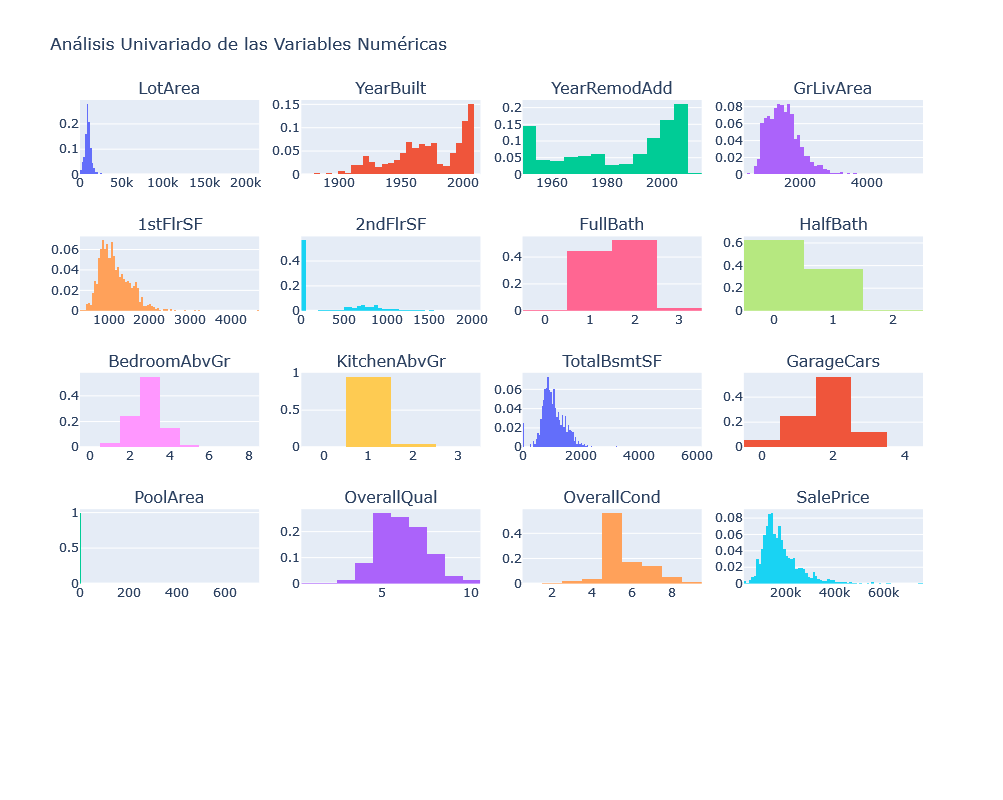

In [11]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

n_cols = 4

fig = make_subplots(
    rows=len(numeric) // n_cols + 1, cols=n_cols, subplot_titles=numeric
)

for idx, col in enumerate(numeric):
    row_idx = idx // n_cols + 1
    col_idx = idx % n_cols + 1
    
    hist = go.Histogram(x=df.loc[:, col], name=col, histnorm="probability")
    fig.add_trace(hist, row=row_idx, col=col_idx)

fig.update_layout(
    height=800,
    title_text="Análisis Univariado de las Variables Numéricas",
    showlegend=False,
)
fig.show()

### Distribuciones de Variables Categóricas

Para las variables categóricas, se genera un conteo de valores únicos.

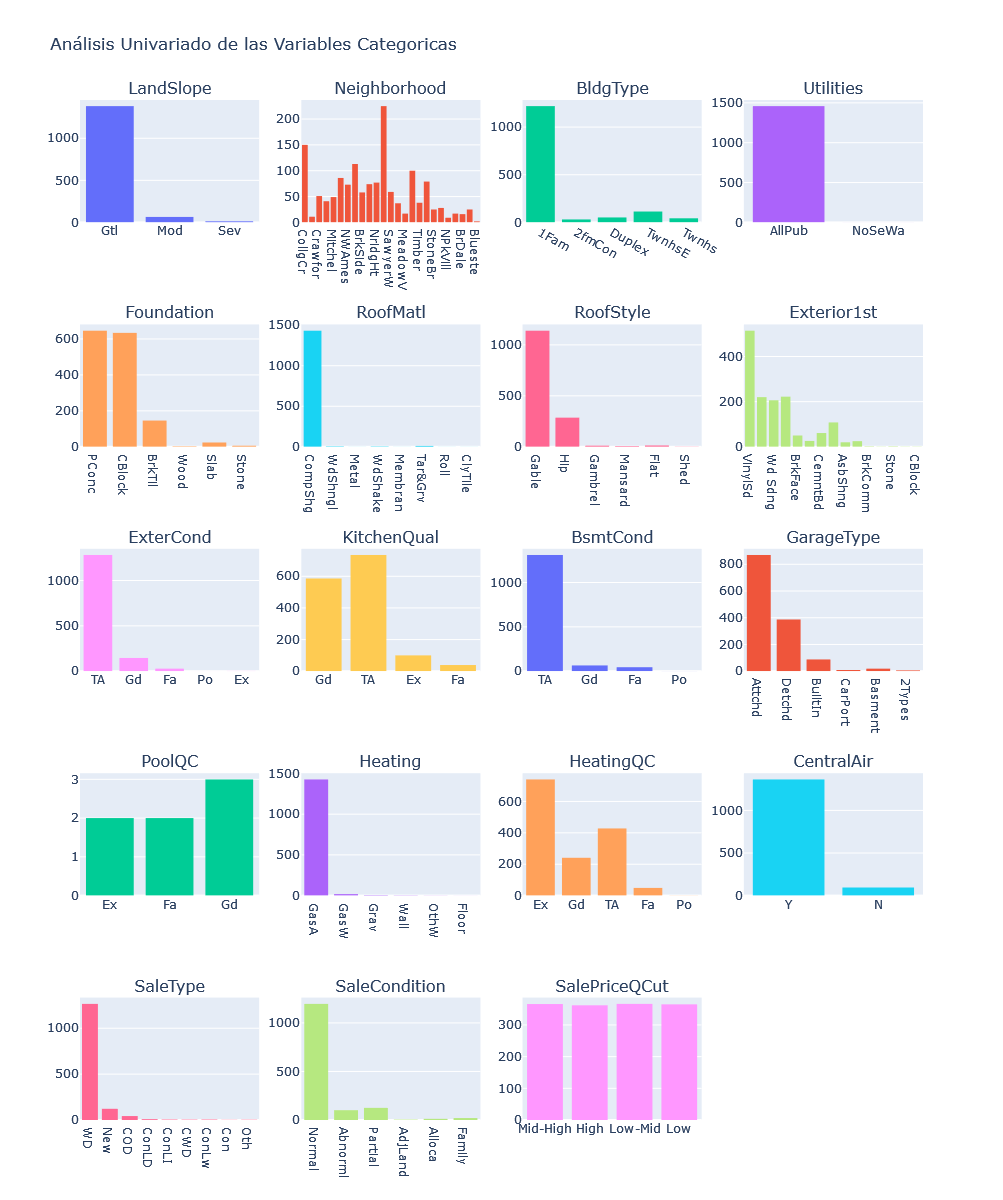

In [12]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

n_cols = 4

fig = make_subplots(
    rows=len(categorical) // n_cols + 1, cols=n_cols, subplot_titles=categorical
)

for idx, col in enumerate(categorical):
    row_idx = idx // n_cols + 1
    col_idx = idx % n_cols + 1

    data = df.loc[:, col]
    hist = go.Histogram(x=data, name=col)
    fig.add_trace(hist, row=row_idx, col=col_idx)

fig.update_layout(
    height=1200,
    title_text="Análisis Univariado de las Variables Categoricas",
    showlegend=False,
)
fig.show()

Al observar las distribuciones, es importante buscar si existe variabilidad dentro de estas, pues por lo general, una variable con un único valor casi seguro, no aporta información a la dinámica de los datos.



## 2. Perfilamiento Multivariado

La idea del perfilamiento bivariado es estudiar las relaciones entre variables de interés. Para esto se pueden emplear visualizaciones de a pares o visualizaciones de una/varias variables con respecto a otra.


Se selecciona un conjunto de variables a examinar

### Scatter Matrix

Una scatter matrix nos permite ver relaciones entre las distintas variables que componen un dataset a través de múltiples scatter plots:

In [13]:
variables_interes = [
    "GrLivArea",
    "TotalBsmtSF",
    "1stFlrSF",
    "2ndFlrSF",
    "FullBath",
    "YearBuilt",
    "OverallQual",
]

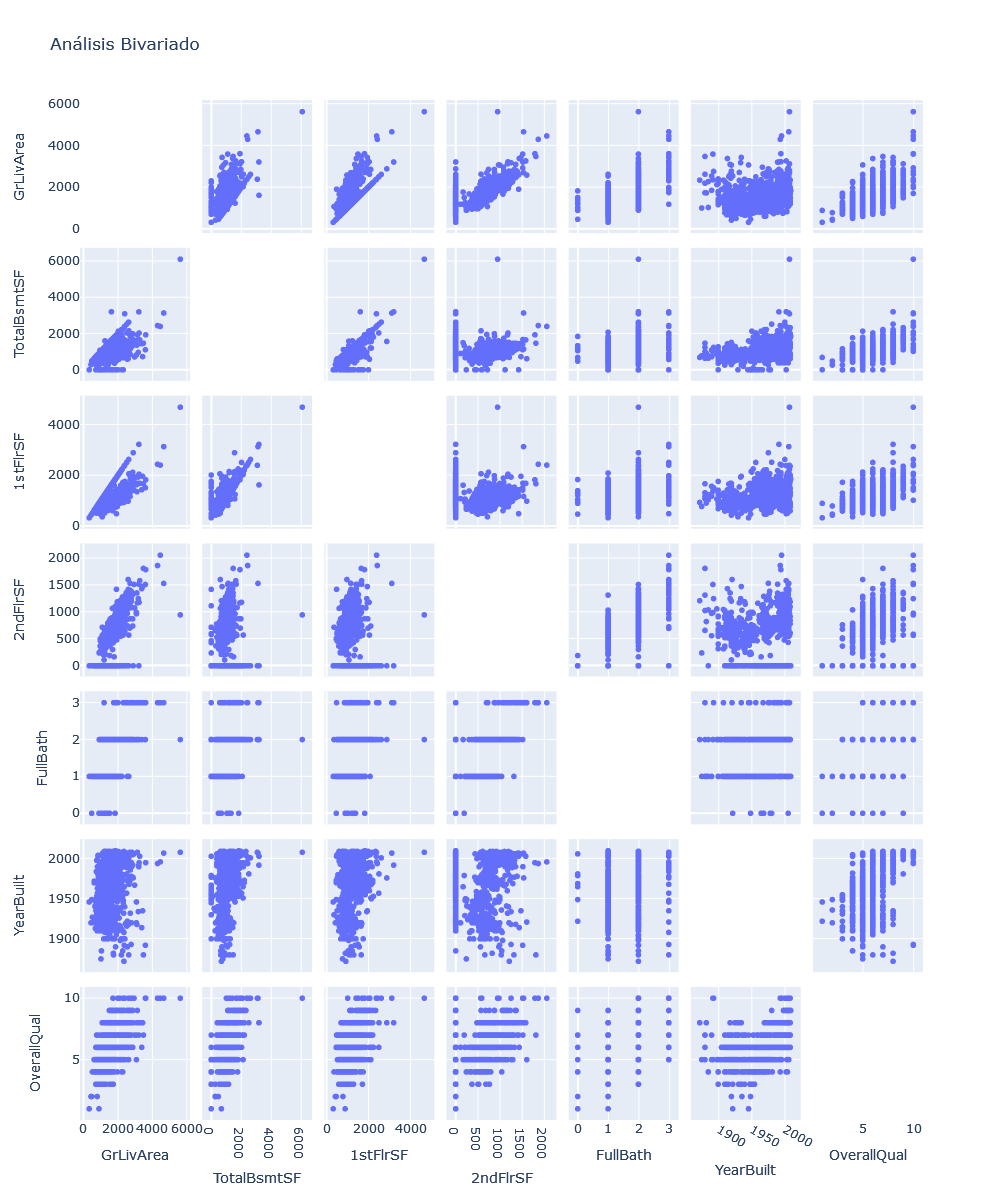

In [14]:
fig = px.scatter_matrix(
    df.sort_values(by="SalePriceQCut", ascending=True),
    dimensions=variables_interes,
    height=1200,
    title="Análisis Bivariado",
)
fig.update_traces(diagonal_visible=False)
fig.show()

La última fila de esta visualización entrega una idea de la relación entre las variables de interés.  Dentro de las interacciones entre variables, se observa que 'GrLivArea' y 'TotalBsmtSf' se comportan de manera similar contra 'OverllQuall', esperandose cierta tendencia creciente en ambos casos.

### Análisis de las Variables Independientes con Respecto a la Variable Dependiente


#### Gráficos de violín

Un gráfico de violín permite sumarizar y observar características de un dataset. Este se comporta como un gráfico de cajas (boxplot), mostrando la mediana, el rango intercuantílico IQR (percentil 75 - percentil 25, o Q3 - Q1) y el rango 1.5 intercuantílico (Q3 +- 1.5 IQR). Además de lo anterior, se suma una estimación de la densidad por kernel a cada lado. Esto quiere decir, que zonas con mayor densidad, se verán como 'montes' horizontales. 

#### OverallQual

Se observa la variable 'OverallQual' (categórica) y se compara con la variable de interés 'SalePrice'. Para ello se usa un gráfico de categórias tipo violín y box (para adicionalmente comparar ambas visualizaciones)

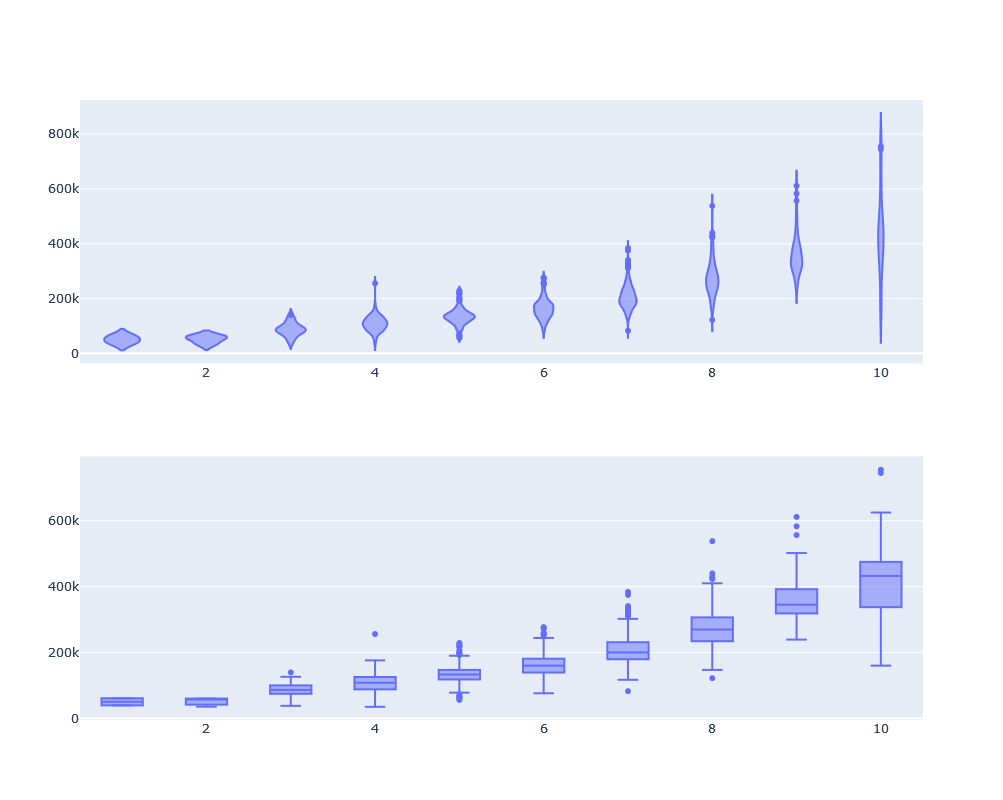

In [15]:
import plotly.express as px

fig = make_subplots(rows=2, cols=1)

fig_1 = px.violin(
    df, x="OverallQual", y="SalePrice", title="Violin plot OverallQuall vs SalePrice"
)
fig.add_trace(fig_1.data[0], row=1, col=1)

fig_2 = px.box(df, x="OverallQual", y="SalePrice")

fig.add_trace(fig_2.data[0], row=2, col=1)

fig.update_layout(height=800)
fig.show()

#### LandSlope

Por otra parte, analizando las gráficas univariadas, se puede observar que para 'LandSlope', se tiene poca variablidad y no genera diferencias en distribución para 'SalePrice' en ninguna de sus categorias. 

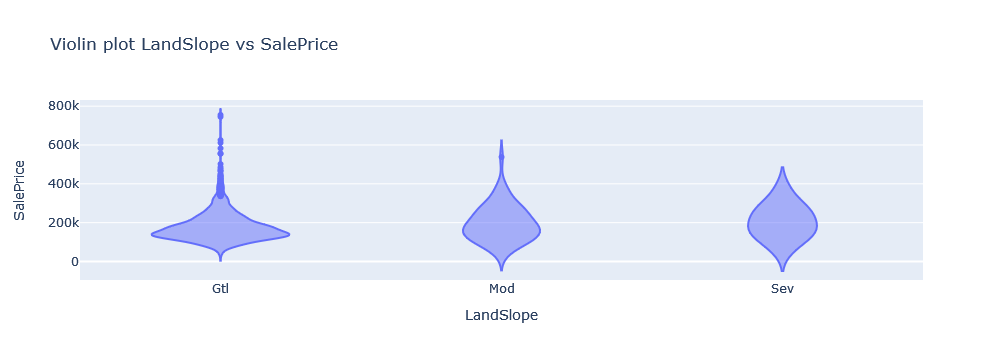

In [16]:
fig = px.violin(
    df, x="LandSlope", y="SalePrice", title="Violin plot LandSlope vs SalePrice"
)
fig.show()

> **Ejercicio ✏️**

1. Los gráficos generados anteriormente siguen exactamente el mismo patrón de generación, lo único que cambia es la columna a analizar. Esto es una mala práctica pues siempre se debe buscar reutilizar código o 'no repetirse' esto se conoce como principio **DRY (don't repeat yourself)**. Construya una función que permita visualizar columnas categóricas del dataset y compararlas con 'SalePrice'. 

2. En función de las visualizaciones construidas, discuta que variables categóricas pueden ser de interés para predecir 'SalePrice'. Busque variabilidad y separación en la distribución de precios. ¿Qué ocurre si una variable categórica posee poca variablidad pero genera buenas separaciones en  'SalePrice'?

#### Gráficos de Dispersión o Scatterplots

Para comparar las variables numéricas, se pueden utilizar gráficos de dispersión contra 'SalePrice'. En este caso, se buscan variabilidad en el histograma univariado y a la vez, se buscan relaciones funcionales (del tipo lineal, exponencial, cuadrático, etc..) con 'SalePrice'. 


Por ejemplo, estudiemos la variable 'GrLivArea'. Para esto, primero definimos una función para gráficar variables numéricas con respecto a 'SalePrice'.

In [17]:
def scatter_dists(numeric_col, trend=None):
    """Dibuja un scatterplot de una columna con respecto a SalePrice.

    numeric_col:str
    Nombre de la columna

    trendline: str
    (Original de plotly) One of `'ols'` or `'lowess'`. If `'ols'`, an Ordinary Least Squares
    regression line will be drawn for each discrete-color/symbol group. If
    `'lowess`', a Locally Weighted Scatterplot Smoothing line will be drawn
    for each discrete-color/symbol group.
    """
    fig = px.scatter(
        df,
        x=numeric_col,
        y="SalePrice",
        title=f"{numeric_col} vs SalePrice",
        trendline=trend,
    )
    fig.show()

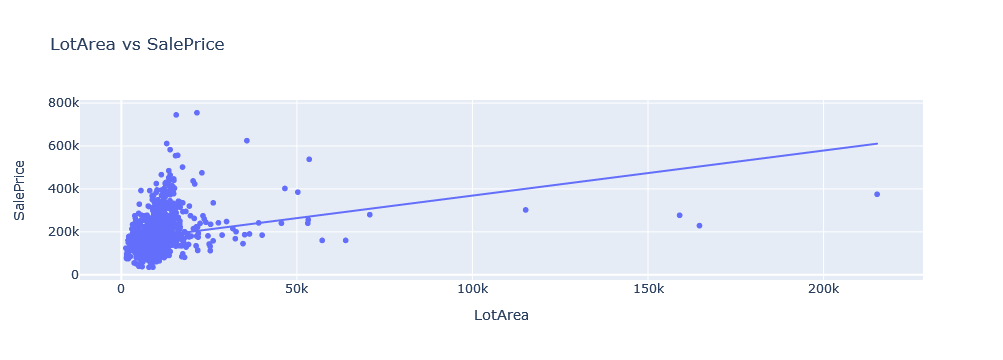

In [18]:
scatter_dists("LotArea", trend="ols")

En este caso, se puede observar una distrbución univariada bien definida y un comportamiento lineal aunque ruidoso. Esto hace que 'GrLivArea' sea una variable de interés. De la misma manera, '1stFlrSF', parece reflejar las mismas buenas características. 



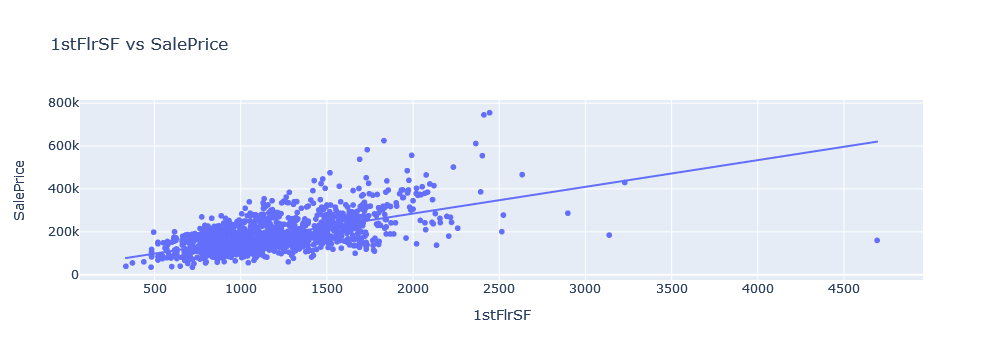

In [19]:
scatter_dists("1stFlrSF", trend="ols")

En el caso de 'TotalBsmtSF' se tiene

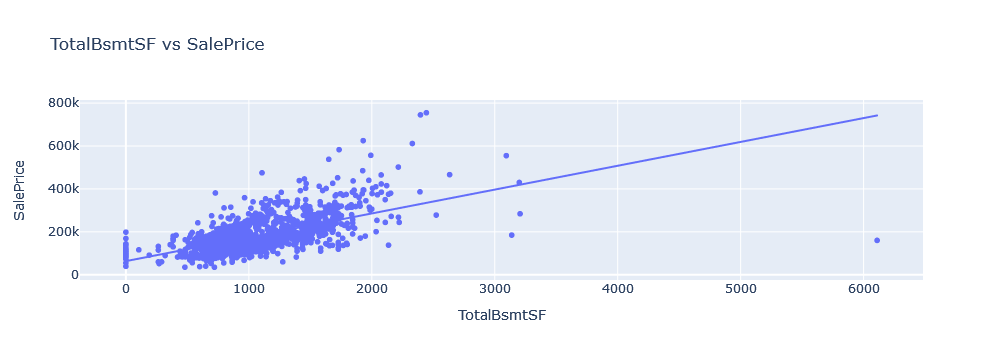

In [20]:
scatter_dists("TotalBsmtSF", trend="ols")

Una relación menos lineal con un poco más de ruido pero una buena distribución en e dataset. Esta variable puede ser de interés pero esto se puede estudiar a posteriori. 

Finalmente para 'MasVnrArea', se tiene

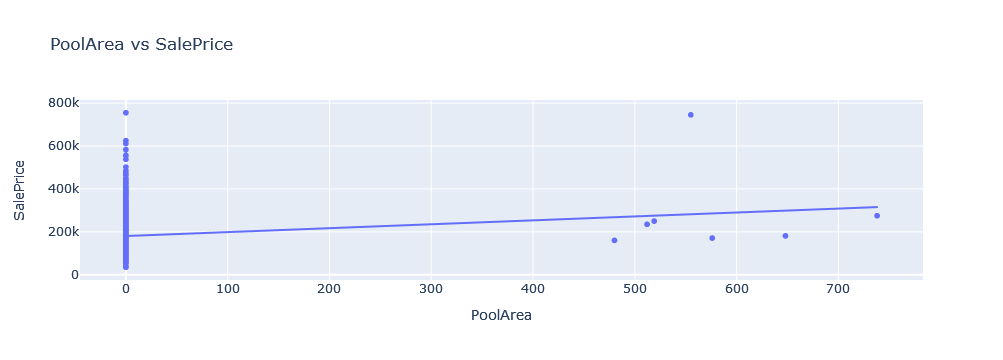

In [21]:
scatter_dists("PoolArea", trend="ols")

Se aprecia una distribución altamente concentrada en el 0 y poco relacionada con la variable a predecir.

> **Ejercicio ✏️**:

1. Estudie las siguientes proposiciones: 

    1.'OverallQual' y 'YearBuilt' parecen relacionadas con 'SalePrice'. 
    2. En el caso de 'OverallQual', esta relación es bastante débil.
    3. En el caso de 'YearBuilt', esta relación es bastante débil.
    4. Los gráficos de caja para 'OverallQual contra  'SalePrice' muestran cierta linealidad con respecto a 'SalePrice'.

2. Estudie la distribución univariada de 'SalePrice', a continuación ejecute el test K^2 de D’Agostino usando `normaltest` del módulo `stats` de SciPy. Compare para una significancia de 5%. ¿ Se puede tratar esta variable como distribuida de manera normal, tomando en cuenta su comportamiento estadístico?

3. Las distribuciones de 'TotalBsmtSF' y '1stFlrSF' parecen bastante similares, más aún sus relaciones con 'SalePrice' comparten una tendencia. Ejecute el [test de Kolmogorov-Smirnov ](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html) por medio de `ks_2samp` para explorar la hipótesis:

 ```'TotalBsmtSF' y '1stFlrSF' vienen de la misma distribución```
 
4. Estudie algunos estadísticos de interés según el tipo de dato.
    
    1. Para las variables numéricas estudie promedios, desviaciones estándar y rangos intercuartílicos. Utilice los rangos calculados para tener una idea del porcentaje de valores fuera de tales rangos por columna. 
    
    2. Para variables catégoricas calcule frecuencias, proporciones y modas. Utilice lo anterior para obtener alguna idea de la variabilidad de los datos.
    

#### Categorías Paralelas

Permite comparar el comportamiento de variables categoricas a través de un gráfico 2d. Cada categoría es representada por una barra y conjuntos de datos similares se agrupan en cintas (*ribbons*).

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   LotArea        1460 non-null   int64         
 1   LandSlope      1460 non-null   category      
 2   Neighborhood   1460 non-null   category      
 3   BldgType       1460 non-null   category      
 4   YearBuilt      1460 non-null   int64         
 5   YearRemodAdd   1460 non-null   int64         
 6   Utilities      1460 non-null   category      
 7   Foundation     1460 non-null   category      
 8   RoofMatl       1460 non-null   category      
 9   RoofStyle      1460 non-null   category      
 10  Exterior1st    1460 non-null   category      
 11  ExterCond      1460 non-null   category      
 12  GrLivArea      1460 non-null   int64         
 13  1stFlrSF       1460 non-null   int64         
 14  2ndFlrSF       1460 non-null   int64         
 15  FullBath       1460 n

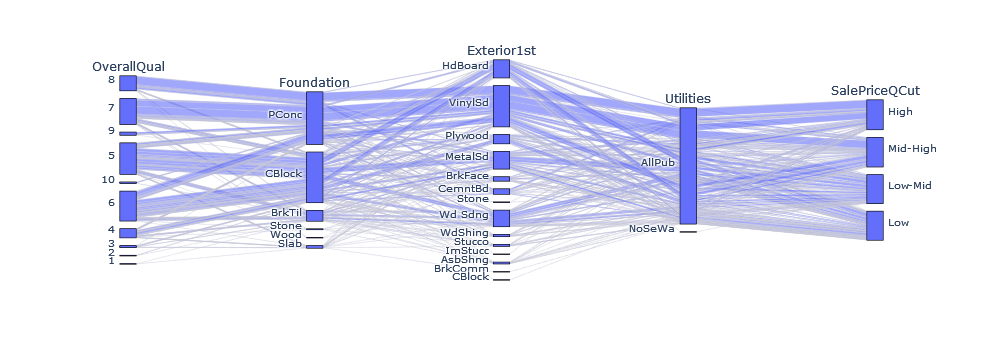

In [23]:
fig = px.parallel_categories(
    df.sample(1000).sort_values("SalePriceQCut", ascending=False),
    dimensions=[
        "OverallQual",
        "Foundation",
        "Exterior1st",
        "Utilities",
        "SalePriceQCut",
    ],
)
fig.show()

> **Ejercicio ✏️**: Explore el equivalente de Categorías Paralelas para variables numéricas ([Coordenadas paralelas](https://plotly.com/python/parallel-coordinates-plot/)) y grafique la relación entre variables numéricas y 'SalePrice'.

### Análisis Temporal

Este análisis nos permite ver como se comportan los valores de alguna variable a través del tiempo.

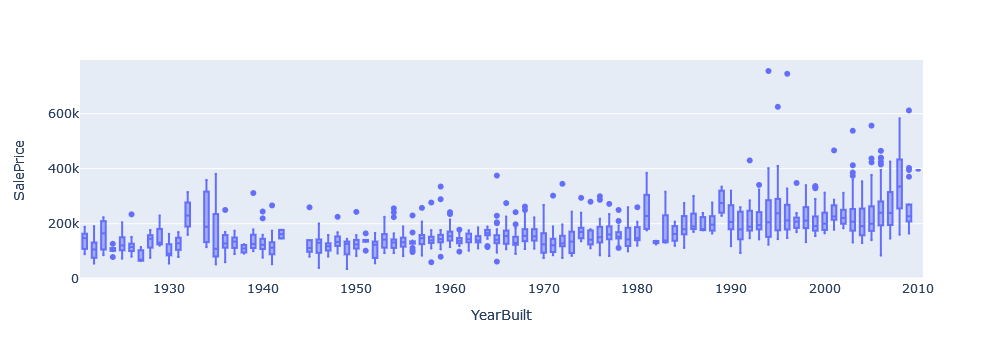

In [24]:
px.box(
    df.query("YearBuilt > 1920").sort_values("YearBuilt"), y="SalePrice", x="YearBuilt"
)

### Correlaciones entre variables

Los análsis iniciales basados en visualizaciones sirven para comprender a grandes rasgos la estructura del dataset. Este tipo de exploración debe ser acompañada de tests estadísticos como los vistos en los ejercicios anteriores. En el caso del perfilamiento bivariado se puede usar una técnica mixta, basada en el análisis de las correlaciones.

>  La correlación indica la fuerza y la dirección de una relación lineal entre dos variables estadísticas. Ojo:  La correlación entre dos variables no implica, por sí misma, ninguna relación de causalidad.

Podemos calcular la matriz de correlaciones por variables numericas usando el método `corr()`.

In [25]:
corrmat = df.corr()

In [26]:
corrmat

LotArea  YearBuilt  YearRemodAdd  GrLivArea  1stFlrSF  \
LotArea       1.000000   0.014228      0.013788   0.263116  0.299475   
YearBuilt     0.014228   1.000000      0.592855   0.199010  0.281986   
YearRemodAdd  0.013788   0.592855      1.000000   0.287389  0.240379   
GrLivArea     0.263116   0.199010      0.287389   1.000000  0.566024   
1stFlrSF      0.299475   0.281986      0.240379   0.566024  1.000000   
2ndFlrSF      0.050986   0.010308      0.140024   0.687501 -0.202646   
FullBath      0.126031   0.468271      0.439046   0.630012  0.380637   
HalfBath      0.014259   0.242656      0.183331   0.415772 -0.119916   
BedroomAbvGr  0.119690  -0.070651     -0.040581   0.521270  0.127401   
KitchenAbvGr -0.017784  -0.174800     -0.149598   0.100063  0.068101   
TotalBsmtSF   0.260833   0.391452      0.291066   0.454868  0.819530   
GarageCars    0.154871   0.537850      0.420622   0.467247  0.439317   
PoolArea      0.077672   0.004950      0.005829   0.170205  0.131525   
OverallQual   0.105806   0.572323      0.550684   0.593007  0.476224   
OverallCond  -0.005636  -0.375983      0.073741  -0.079686 -0.144203   
SalePrice     0.263843   0.522897      0.507101   0.708624  0.605852   

              2ndFlrSF  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
LotArea       0.050986  0.126031  0.014259      0.119690     -0.017784   
YearBuilt     0.010308  0.468271  0.242656     -0.070651     -0.174800   
YearRemodAdd  0.140024  0.439046  0.183331     -0.040581     -0.149598   
GrLivArea     0.687501  0.630012  0.415772      0.521270      0.100063   
1stFlrSF     -0.202646  0.380637 -0.119916      0.127401      0.068101   
2ndFlrSF      1.000000  0.421378  0.609707      0.502901      0.059306   
FullBath      0.421378  1.000000  0.136381      0.363252      0.133115   
HalfBath      0.609707  0.136381  1.000000      0.226651     -0.068263   
BedroomAbvGr  0.502901  0.363252  0.226651      1.000000      0.198597   
KitchenAbvGr  0.059306  0.133115 -0.068263      0.198597      1.000000   
TotalBsmtSF  -0.174512  0.323722 -0.048804      0.050450     -0.068901   
GarageCars    0.183926  0.469672  0.219178      0.086106     -0.050634   
PoolArea      0.081487  0.049604  0.022381      0.070703     -0.014525   
OverallQual   0.295493  0.550600  0.273458      0.101676     -0.183882   
OverallCond   0.028942 -0.194149 -0.060769      0.012980     -0.087001   
SalePrice     0.319334  0.560664  0.284108      0.168213     -0.135907   

              TotalBsmtSF  GarageCars  PoolArea  OverallQual  OverallCond  \
LotArea          0.260833    0.154871  0.077672     0.105806    -0.005636   
YearBuilt        0.391452    0.537850  0.004950     0.572323    -0.375983   
YearRemodAdd     0.291066    0.420622  0.005829     0.550684     0.073741   
GrLivArea        0.454868    0.467247  0.170205     0.593007    -0.079686   
1stFlrSF         0.819530    0.439317  0.131525     0.476224    -0.144203   
2ndFlrSF        -0.174512    0.183926  0.081487     0.295493     0.028942   
FullBath         0.323722    0.469672  0.049604     0.550600    -0.194149   
HalfBath        -0.048804    0.219178  0.022381     0.273458    -0.060769   
BedroomAbvGr     0.050450    0.086106  0.070703     0.101676     0.012980   
KitchenAbvGr    -0.068901   -0.050634 -0.014525    -0.183882    -0.087001   
TotalBsmtSF      1.000000    0.434585  0.126053     0.537808    -0.171098   
GarageCars       0.434585    1.000000  0.020934     0.600671    -0.185758   
PoolArea         0.126053    0.020934  1.000000     0.065166    -0.001985   
OverallQual      0.537808    0.600671  0.065166     1.000000    -0.091932   
OverallCond     -0.171098   -0.185758 -0.001985    -0.091932     1.000000   
SalePrice        0.613581    0.640409  0.092404     0.790982    -0.077856   

              SalePrice  
LotArea        0.263843  
YearBuilt      0.522897  
YearRemodAdd   0.507101  
GrLivArea      0.708624  
1stFlrSF       0.605852  
2ndFlrSF       0.319334  
FullBath       0.560664  
HalfBath     

se muestran las dos variables más correlacionadas (positivamente) con 'SalePrice'.

Y lo podemos graficas usando `px.imshow`

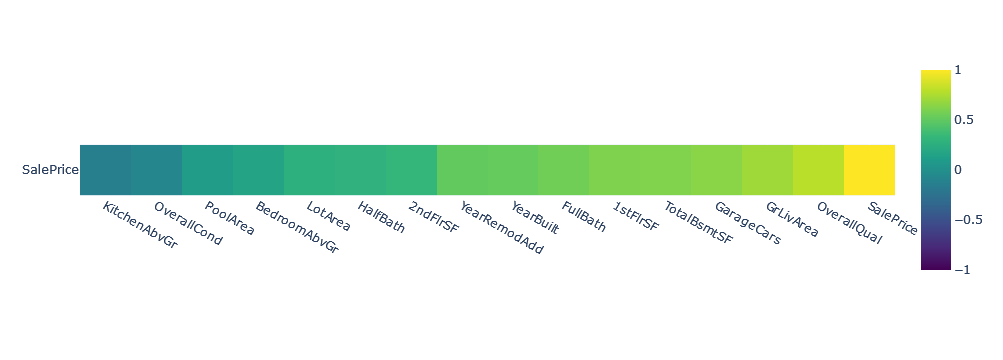

In [27]:
# Univariado: Cada variable con respecto al precio

px.imshow(
    corrmat.loc[["SalePrice"], :].sort_values("SalePrice", axis=1),
    zmin=-1,
    zmax=1,
    color_continuous_midpoint=0,
    color_continuous_scale=px.colors.sequential.Viridis,
)

Si bien, las correlaciones con 'SalePrice' deben ser analizadas con más detenimiento, se pude ver claramente que 'GrLivArea', 'TotalBsmtSF', y 'OverallQual' juegan un papel preponderante en el valor de la propiedad.

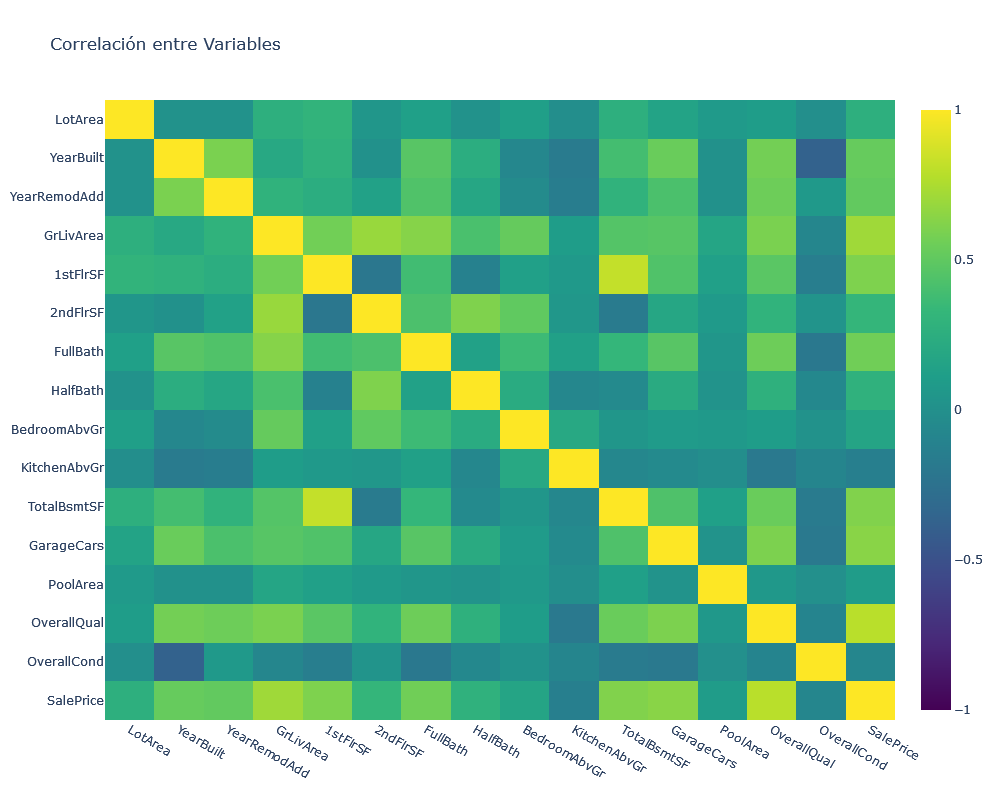

In [28]:
px.imshow(
    corrmat,
    aspect="16:9",
    title="Correlación entre Variables",
    height=800,
    zmin=-1,
    color_continuous_midpoint=0,
    zmax=1,
    color_continuous_scale=px.colors.sequential.Viridis,
)

Según el esquema de valores, se buscan los puntos más claros y más oscuros fuera de la diagonal. En primera instancia, las variables  'TotalBsmtSF' y '1stFlrSF' parece bastante correlacionadas, lo mismo ocurre con la variables 'GarageCars' y 'GarageArea', esto puede indicar multicolinearidad que implica información duplicada o relacionada de manera trivial en el dataset. 

> **Ejercicio ✏️**: Obtenga las 15 correlaciones más altas (positiva o negativa) con 'SalePrice'.


### Tablas de Contingencia

Para analizar valores categóricos (categórico vs categórico) existen herramientas especializadas una de ellas es por medio de tablas de dos tratamientos o de contingencia (2 way tables). 

Estas permiten calcular el numero de ocurrencias de una variable para cada una de sus categorías en comparación con los valores de otra variable.

Por ejemplo, construyamos una tabla para analizar 'OverallQual' vs 'GarageCars':

In [29]:
# Se construye la tabla
tabla = pd.crosstab(
    index=df["OverallQual"],
    columns=df["GarageCars"],
    margins=True,
    margins_name="Total",
)
tabla

GarageCars    0    1    2    3  4  Total
OverallQual                             
1             2    0    0    0  0      2
2             1    2    0    0  0      3
3             6    6    6    2  0     20
4            26   50   37    1  2    116
5            32  195  163    6  1    397
6            12   95  264    3  0    374
7             1   20  258   38  2    319
8             1    1   86   80  0    168
9             0    0    8   35  0     43
10            0    0    2   16  0     18
Total        81  369  824  181  5   1460

Para el caso de  'OverallQual' y 'GarageCars' vemos que tienden a acumularse dentro de una rango reducido, se puede concluir que a medida que 'OverallQual' crece entre 4 y 6, aparece un aumento considerable en la categoría 'GarageCars' hasta que esta última llega al valor 2, valores superiores paracieran ser independientes de 'OverallQual'. 

> **Ejercicios ✏️**

1. Compare variables categóricas usando este método, ¿se puede encontrar alguna relación entre categórias?

2. Es posible aplicar este método para comparar variables categóricas y continuas, para esto se necesita categorizar la variable continua objetivo. Categoríce la variable 'SalePrice' en 5 tramos y compare con 'OverallQual' ¿Se observa alguna tendencia?


Otra forma de comparar variables categóricas es por medio de un test $\chi^2$. Este permite obtener un indicador de significancia estadística entre variables. Se basa en una tabla de contingencia y proporciona la probabilidad de que dos variables categóricas sean independientes basádandose en el estádistico $\chi^2$, entrega también un arreglo con frecuencias esperadas.

In [30]:
from scipy.stats import chi2_contingency

# Se debe trabajar la tabla sin margenes
tabla = pd.crosstab(index=df["OverallQual"], columns=df["GarageCars"], margins=False)

chi2, p, dof, ex = chi2_contingency(tabla)

La tabla de frecuencias esperadas se puede interpretar de la siguiente forma:

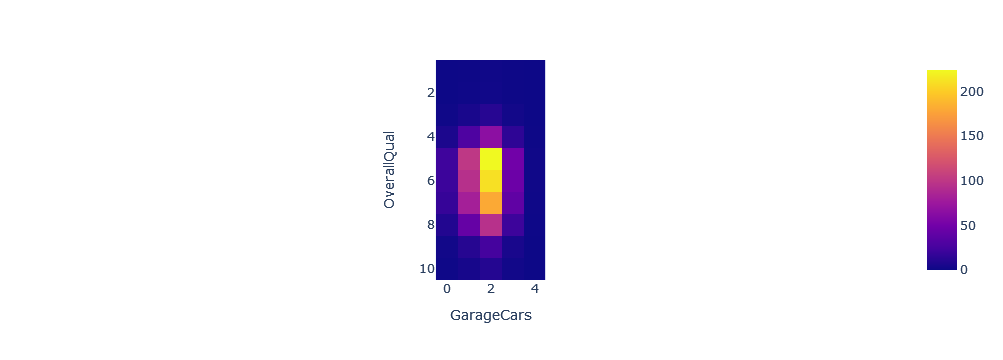

In [31]:
expected_freq = pd.DataFrame(ex, index=range(1, 11))
expected_freq.index.name = "OverallQual"
expected_freq.columns.name = "GarageCars"
px.imshow(expected_freq)

Aquí, la frecuencia esperada para la la categoría 1 'OverallQual' de estar en la categoría 0 de 'GarageCars' es 0.11. Se puede decir que esta configuración es muy poco probable en comparación a otras como pertenecer a la categoría 6 de 'OverallQual' y 2 de 'GarageCars'. Este tipo de tablas permite clasificar las relaciones entre variables categóricas y obtener *insights* sobre las dinámicas que el dataset refleja. 

El valor $p$ entregado por el cáculo corresponde a:

In [32]:
p

3.541426937422792e-182

Si para este test llamamos $\alpha$ al valor de significancia, se puede resumir:

1. Si $p > \alpha$ no hay evidencia para rechazar la hipótesis nula por lo que se pueden considerar independientes.

2. Si $p \leq \alpha$ hay evidencia para rechazar la hipótesis nula por lo que se puede decir que existe una dependencia estadística entre las variables. 


Para una significancia del 5% , hay evidencia para rechazar la hipótesis de independencia entre 'OverallQual' y 'GarageCars', luego puede existir un factor latente que las relaciona (¿será 'SalePrice'?)

In [33]:
p <= 0.05

True

Como consideración general, para que este test sea consistente estadísticamente, se deben observar frecuencias (esperadas y observadas) mayores a 5. 

**Ejercicio**

1. Utilice el gráfico de correlaciones para escojer dos variables categóricas de interés. Verifique si existen relaciones estadísticas entre ellas. 

Finalmente, para comparar variables numéricas y categóricas, es posible utilizar técnicas especializadas como lo son los tests Z y T. Estos tests se utilizan de manera simultanea con gráficos de caja (o violín), donde cada caja representa una categoría. 

Tanto el test Z como el T permiten verificar si las medias de dos grupos son estadísticamente diferentes entre si. aquí, el estadístico Z se define por

\begin{equation}z=\frac{\left|\bar{x}_{1}-\bar{x}_{2}\right|}{\sqrt{\frac{s_{1}^{2}}{n_{1}}+\frac{s_{2}^{2}}{n_{2}}}}\end{equation}

Si su probabilidad asociada es pequeña, entonces **la diferencia de las medias** es significativa. 

Por otra parte, el estadístico T es más robusto a tamaños de observaciones pequeños (menores que 30 por ejemplo), este viene dado por 

\begin{equation}
t=\frac{\bar{X}_{1}-\bar{X}_{2}}{\sqrt{S^{2}\left(\frac{1}{N_{1}}+\frac{1}{N_{2}}\right)}}
\end{equation}

Donde 

\begin{equation}
S^{2}=\frac{\left(N_{1}-1\right) S_{1}^{2}+\left(N_{2}-1\right) S_{2}^{2}}{N_{1}+N_{2}-2}
\end{equation}

Aquí , $\bar{X}_{1}, \bar{X}_{2}$ son las medias, $S_{1}^{2}, S_{2}^{2}$ varianzas y $N_1$ , $N_2$ los totales de cada grupo a testear. 

**Ejercicios**

1. Utilice el test de independencia $t$ (o 2 - sample $t$-test) para comparar 2 variables continuas de interés. [*Hint*](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)

2. Observe que el caso categórico vs continuo, cada categoría representa un grupo de valores continuos asociados. Por ejemplo, si la variable categórica `A` tiene las categorías `c_1` y `c_2`, al compararla con la variable continua `B`, es necesario agrupar los valores de `B` para `c_1` y para `c_2` para luego estudiar su independencia. Utilice el test anterior para medir independencias de grupos entre una variable categórica vs 'SalePrice'. **Obs**: La variable categórica debe ser bivariada.

3. Utilice el test Z con las variables anteriores y compare. ¿Qué restricciones extra posee este test?

Finalmente, se puede hacer uso de un test F o ANOVA. Este test permite comparar más de una media al mismo tiempo, una manera simple de aplicar este test consiste en método conocido como **one way ANOVA**, aquí, se testea si más de 2 grupos son similares basados en sus medias. En este caso, la hipótesis nula es 

`No hay diferencia significativa entre los grupos`

**Ejemplo**

Se selecciona la variable 'GarageCars' y se compara con 'SalePrice'. 

In [34]:
grouped = df[["SalePrice", "GarageCars"]].groupby("GarageCars")

En la variable 'GarageCars' se distinguen 5 categorías

In [35]:
len(df["GarageCars"].unique())

5

a partir de la agrupación anterior, se forman entonces 5 grupos de valores para 'SalePrice'.

In [36]:
len(grouped.groups)

5

Se obtienen los grupos

In [37]:
total_groups = len(grouped.groups)
groups = [grouped.get_group(i) for i in range(total_groups)]

Se muestra el grupo correspondiente a la categoría 0

In [38]:
groups[0].head()

SalePrice  GarageCars
Id                       
40      82000           0
49     113000           0
79     136500           0
89      85000           0
90     123600           0

Se limpia el formato de cada grupo

In [39]:
def group_cleaner(group):
    """Limpia un grupo.
    Reconoce la categoria del grupo, en la posicion [:,1],
    guarda ese nombre y elimina la columna de categoria,
    posteriormente renombra la columna.

    Args:
    ----------

    group: pandas Groupby object
          Recibe una agrupacion para categorias

    Returns:
    ----------
        pandas Grppuby object
        Entrega el grupo ordenado.
    """
    group_0 = group.copy()
    name = group_0.iloc[0, 1]
    group_0.drop("GarageCars", axis=1, inplace=True)
    print(name)
    group_0.columns = ["cat_{}".format(name)]

    return group_0

se procede a limpiar

In [40]:
groups_to_test = list(map(group_cleaner, groups))

0
1
2
3
4


Se muestra el grupo correspondiente a la categoria 0 post limpieza

In [41]:
groups_to_test[0]

cat_0
Id          
40     82000
49    113000
79    136500
89     85000
90    123600
...      ...
1350  122000
1408  112000
1450   92000
1451  136000
1454   84500

[81 rows x 1 columns]

Se procede a testear

In [42]:
from scipy.stats import f_oneway

F, p = f_oneway(*groups_to_test)

print("Estadistico F:", F)
print("p valor :", p)

Estadistico F: [351.20748621]
p valor : [1.12112877e-211]


probando para una significancia del 5% se tiene hay evidencia para rechazar la hipótesis nula y por tanto hay una diferencia significativa entre los grupos. 

In [43]:
alpha = 0.05
p <= alpha

array([ True])

**Ejercicio ✏️**: Compruebe el resultado del test ANOVA anterior con un analísis visual por medio de gráficos de violín.

## 3. Manejo de datos faltantes 

Los métodos estándar de manejo de datos han sido desarrollados para para analizar arreglos tabulares. Por lo general las filas de tal arreglo representan observaciones y las columnas sus características asociadas. Cada entrada en este arreglo puede ser modelada como un número, siendo este ligado a un proceso subyacente continuo o discreto. Para comprender tal proceso, es de utilidad sumarizar y observar los valores faltantes con el fin de obtener patrones y seleccionar estrategias para tratarlos. 

### Exploración de valores faltantes

Cuando los datos faltantes se encuentran en variables que no son de interés, se pueden obviar. Sin embargo, esto no es la regla general.


In [44]:
df.isnull().sum()

LotArea             0
LandSlope           0
Neighborhood        0
BldgType            0
YearBuilt           0
YearRemodAdd        0
Utilities           0
Foundation          0
RoofMatl            0
RoofStyle           0
Exterior1st         0
ExterCond           0
GrLivArea           0
1stFlrSF            0
2ndFlrSF            0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotalBsmtSF         0
BsmtCond           37
GarageType         81
GarageCars          0
PoolArea            0
PoolQC           1453
Heating             0
HeatingQC           0
CentralAir          0
OverallQual         0
OverallCond         0
DateSold            0
SaleType            0
SaleCondition       0
SalePrice           0
SalePriceQCut       0
dtype: int64

Sin embargo, basta observar las columnas para comprender que tales variables si poseen valores faltantes

In [45]:
var_missing = ["BsmtCond", "GarageType", "PoolQC"]

df[var_missing].head()

BsmtCond GarageType PoolQC
Id                           
1        TA     Attchd    NaN
2        TA     Attchd    NaN
3        TA     Attchd    NaN
4        Gd     Detchd    NaN
5        TA     Attchd    NaN

Por tal motivo es necesario realizar una exploración inicial de los datos faltantes en conjunción con los análisis de distribución iniciales. 

**Ejercicios ✏️**

1. Estudie la distribución de los valores faltantes en las variables numéricas.

2. Considerando que para las variables categóricas las variables con valor 'nan' son consideradas como una nueva categoría. ¿Se ven afectados los análisis anteriores sobre sus distribuciones?

**Ejemplo**

Para estudiar en mayor profundidad la distribución de los valores faltantes, se procede a transformarlos en formato `np.nan`

In [46]:
df.replace("nan", np.nan, inplace=True)

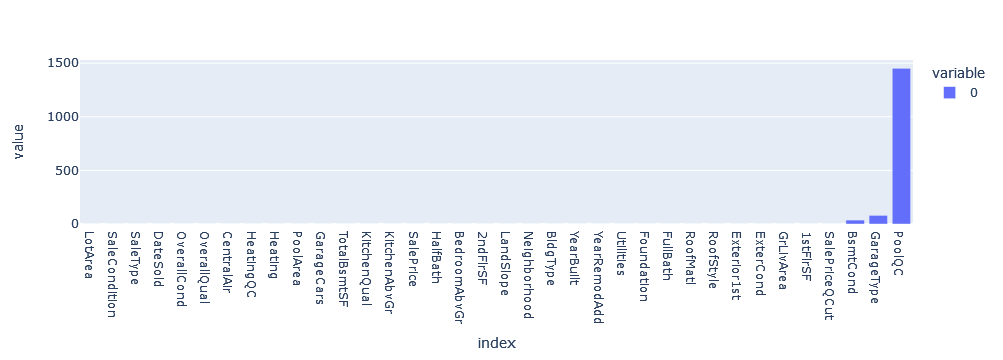

In [47]:
px.bar(df.isnull().sum().sort_values())

### Nullity Matrix 

En términos generales, los valores perdidos de este dataset se encuentran relativamente limpios pues están estandarizados con la categoría 'nan'.


Dado que sumarizar valores faltantes genera una estructura de datos, vale la pena explorarla visualmente, para facilitar tal tarea, existe la librería `missingno`

In [48]:
# Instalamos el paquete usando conda o pip
import sys

!conda install --yes --prefix {sys.prefix} missingno
# !{sys.executable} -m pip install numpy # descomentar si se usa pip
import missingno as msno

Solving environment: done

# All requested packages already installed.



Las visualizaciones de generadas por medio de esta librería pueden ser utilizadas para discutir el problema de valores faltantes y generan una estrategia para su tratamiento.

In [49]:
df.isnull().sum().nlargest(10)

PoolQC          1453
GarageType        81
BsmtCond          37
LotArea            0
LandSlope          0
Neighborhood       0
BldgType           0
YearBuilt          0
YearRemodAdd       0
Utilities          0
dtype: int64

mediante la libreria `missingno` es posible ver el panorama completo de los valores faltanes en el dataset de manera sencilla 

<AxesSubplot:>

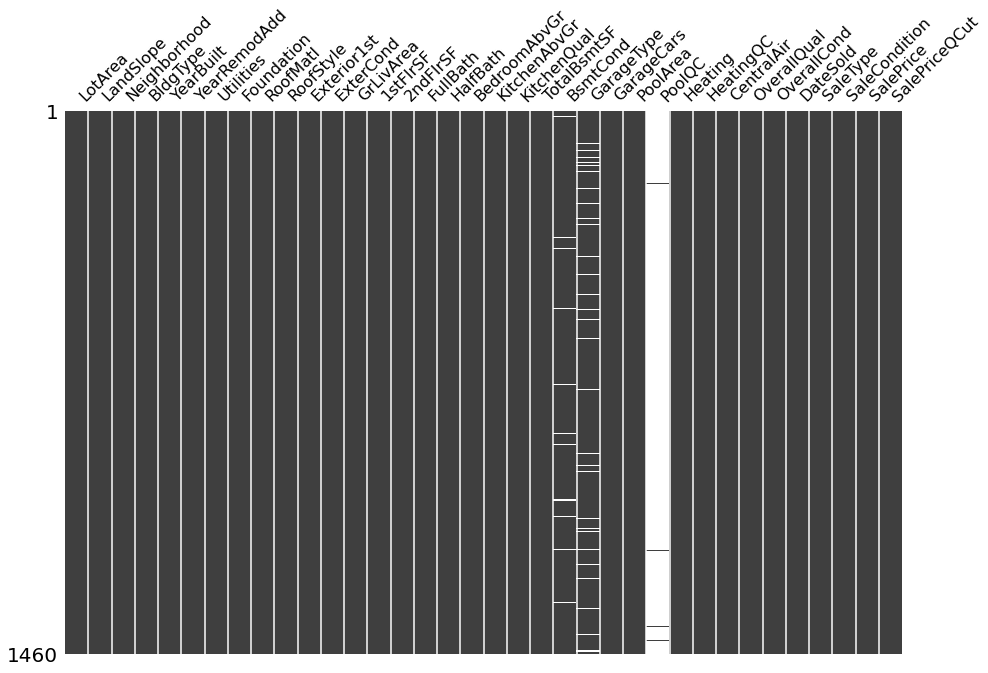

In [50]:
import matplotlib.pyplot as plt
import missingno as msno

fig, ax = plt.subplots(figsize=[15, 10])

msno.matrix(df, ax=ax, sparkline=False)

**Ejercicio ✏️**

1. Genere un subconjunto con las 10 columnas con mayor información faltante y genere el gráfico anterior sin usar un objeto `axes` y con la opción `sparkline=True`.

Esta visualización muestra que exiten columnas practicamente sin información, según la agregación anterior, estas corresponden a 'PoolQC', 'MiscFeature' y 'Alley'. 

Por medio de correlaciones entre valores faltantes, es posible obtener un análisis bivariado análogo al anteriormente generado. Para ello se puede utilizar un mapa de calor.

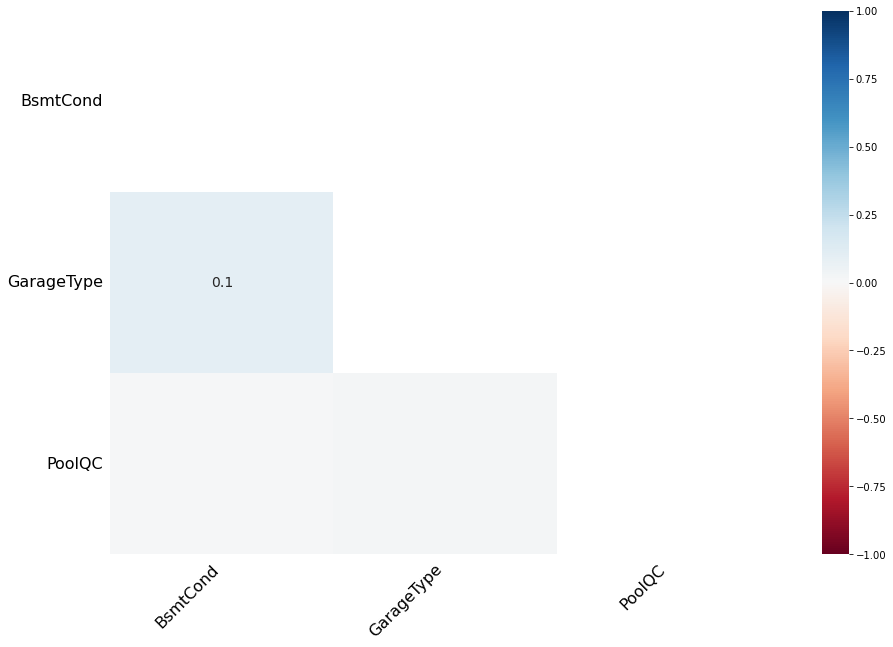

In [51]:
fig, ax = plt.subplots(figsize=[15, 10])
msno.heatmap(df, ax=ax)

plt.show()

Este gráfico muestra correlaciones de nulidad entre pares de variables, estas varian desde -1 a 1, donde

- $-1$ significa que las variables son excluyentes, es decir, la aparición de una hace que la otra este ausente. 
- $1$ corresponde inclusión, esto quiere decir, que la aparición de una hace que la otra aparezca. Valores cercanos a 0 (sin valor numérico en el gráfico) indican ausencia de relación de nulidad entre las variables.

En el gráfico recien generado, no se observen relaciones de nulidad negativa, por otra parte, existen variables fuertemente relacionadas en cuanto a su información como lo son 'MasVnrType' y 'MasVnrArea', el comportamiento general es que la información esta fuertemente relacionada (en el sentido de inclusión de información) o simplemente no lo está. 


> **Ejercicio ✏️**

1. El gráfico de correlaciones de nulidad permite tener una idea de como se relaciona la información faltante en pares de variables. Para comparar más de dos variables es posible utilizar un *dendograma*. Utilice las 20 variables con mayor cantidad de valores faltanes visualice su dendograma por medio de `msno.dendogram`. Interprete los resultados.[*Hint*](https://github.com/ResidentMario/missingno)




> **Pregunta ❓**: ¿Qué hacemos con las columnas con datos faltantes?

---

## 4. `Pandas Profiling`


Pandas Profiling es una herramienta de perfilamiento automático de variables, el cuál dado un dataframe, genera un reporte en formato HTML.
El reporte contiene información detallada sobre cada variable más gráficos de interacciones y correlaciones entre estas. Según la documentación, los perfiles generados contienen: 


- **Type inference**: detect the types of columns in a dataframe.
- **Essentials**: type, unique values, missing values
- **Quantile statistics** like minimum value, Q1, median, Q3, maximum, range, interquartile range
- **Descriptive statistics** like mean, mode, standard deviation, sum, median absolute deviation, coefficient of variation, kurtosis, skewness
- **Most frequent values**
- **Histogram**
- **Correlations** highlighting of highly correlated variables, Spearman, Pearson and Kendall matrices
- **Missing values matrix**, count, heatmap and dendrogram of missing values
- **Text analysis** learn about categories (Uppercase, Space), scripts (Latin, Cyrillic) and blocks (ASCII) of text data.
- **File and Image analysis** extract file sizes, creation dates and dimensions and scan for truncated images or those containing EXIF information.


Bien usada, es una herramienta muy poderosa que les permitirá acelerar mucho el Análisis Exploratorio de Datos.
Sin embargo, simpre estará la posibilidad de que tengan que programar algo "a mano" ya que el análisis entregado por el profiler no es suficiente.

In [52]:
!pip install ipywidgets
!pip install pandas_profiling

In [53]:
from pandas_profiling import ProfileReport

profile = ProfileReport(
    df,
    title="Reporte Housing Pricing",
    explorative=True,
    vars={"num": {"low_categorical_threshold": 0}} # resolver problema #954
)

# Problema 954:
# https://github.com/ydataai/pandas-profiling/issues/954

profile.to_file("report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]